<a href="https://colab.research.google.com/github/stjohn/datasci/blob/main/openDataWeek/GettingStartedWithPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reading Structured Data: Parking Tickets

In this section, we will 

*  run Python in a notebook, which has code intermixed with explanation.
*  explore the NYC OpenData data for parking tickets given in the city,
*  in particular, who got the most for 20th District?
and 
*  which color car gets the most?


### Running Commands:

To get started, let's first execute a simple command that will print "Hello World" to the screen.  To run the command, click to the left side of the "cell" (it will appear as brackets or a "Play" symbol, depending on your system).  It may take a little bit of time to load, but you will see the message on the next line:

In [1]:
print("Hello World")

Hello World


##Binning Data: Parking Tickets
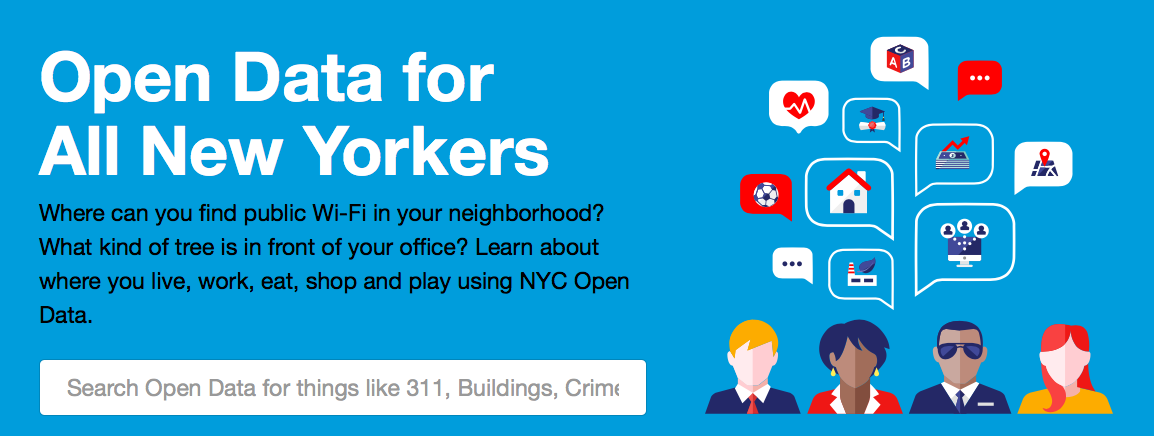

Via the NYC Open Data project, you can access data from almost every city agency. Today, we will look at the parking tickets issues by New York City. We will use a small version (1000 lines), but you are welcome to also use any neighborhood in the city. To download data for a given neighborhood (and restricted to just the current fiscal year, since the data sets can be quite large):

* Instead of neighborhood name or zipcode, parking tickets are classified by the police precinct that issued the ticket. First, figure out the precinct (here's a [useful tool](https://www1.nyc.gov/site/nypd/bureaus/patrol/find-your-precinct.page)).
* [Fiscal year parking tickets for your precinct](https://data.cityofnewyork.us/City-Government/Parking-Violations-Issued-Fiscal-Year-2022/pvqr-7yc4/data): download the data set as a CSV, filtering by "Violation Precinct". For example, Hunter College is located in the 19th Precinct, so, you would enter 19 on the filter.

A simple, but very powerful, technique is *binning data*-- that is grouping data into the number of occurrences for each categories. The category values can often show patterns that individual data points do not. For example, binning population by zipcode can show patterns in density that's difficult to see with individual data points.

##CSV Data Files

To make reading files easier, we will use the Pandas library that lets you read in structured data files very efficiently. [Pandas](https://pandas.pydata.org), Python Data Analysis Library, is an elegant, open-source package for extracting, manipulating, and analyzing data, especially those stored in 2D arrays (like spreadsheets).

In Pandas, the basic structure is a DataFrame which stored data in rectangular grids. The Comma-Separated-Values (CSV) files, we saw in the previous section, store tabular information in readable text files. The files downloaded above have information separated by commas (using tabs as delimiters is also common). 

Let's use Pandas to examine a small subset of parking tickets given every year.  This set is 1000 tickets from the Upper West Side (District 20) in 2016:

In [3]:
import pandas as pd
url = 'https://raw.githubusercontent.com/stjohn/datasci/main/openDataWeek/tickets.csv'
tickets = pd.read_csv(url)

The commands above load the Pandas library, and alias its name to the common abbreviation: pd.  The small CSV files of tickets is then read and stored in a variable, called tickets:

In [4]:
tickets

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,1335632335,L040HZ,FL,PAS,06/09/2015,46,SUBN,NISSA,X,35430,...,RED,0.0,0,-,0,NaN,NaN,NaN,NaN,NaN
1,1351345497,GYA2946,NY,PAS,06/25/2015,21,SDN,FORD,S,35550,...,TAN,0.0,2011,-,0,NaN,NaN,NaN,NaN,NaN
2,1355390564,T512895C,NY,OMT,07/06/2015,20,SUBN,LINCO,P,35210,...,BLACK,0.0,2010,-,0,NaN,NaN,NaN,NaN,NaN
3,1355390825,GVX5273,NY,PAS,06/28/2015,20,SDN,HONDA,P,35210,...,RED,0.0,1994,-,0,NaN,NaN,NaN,NaN,NaN
4,1355390862,GOLPO,NY,OMT,07/06/2015,19,VAN,TOYOT,P,0,...,BLUE,0.0,2014,-,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,7326771054,XARL98,NJ,PAS,07/24/2015,14,DELV,ISUZU,T,15710,...,WHITE,NaN,0,NaN,0,40 7,14-No Standing,NaN,NaN,NaN
995,7326771121,HXD2344,PA,PAS,07/24/2015,21,4DSD,TOYOT,T,35510,...,GREY,NaN,0,NaN,0,40 7,21-No Parking (street clean),NaN,NaN,NaN
996,7326771182,XR351G,NJ,PAS,07/24/2015,16,VAN,FORD,T,11710,...,WHITE,NaN,0,NaN,0,40 7,16-No Std (Com Veh) Com Plate,NaN,NaN,NaN
997,7326771236,GVA4260,NY,PAS,07/24/2015,40,SUBN,NISSA,T,35570,...,GREY,NaN,2011,NaN,0,40 7,40-Fire Hydrant,NaN,NaN,NaN


If working through this in colab, you can click on the blue magic wand in the bottom left corner to explore the data.  You can click on columns to sort the data by that column and page through the data.  

Using the interactive table viewing:  
* What is the earliest day a ticket was given?
* How many tickets went to cars with Vermont (VT) license plates? 

We can use Python to explore the data further.  To see all the license plates, we write the name of the DataFrame, followed by the column ('Plate ID') that contains licence plate information:

In [5]:
tickets['Plate ID']

0        L040HZ
1       GYA2946
2      T512895C
3       GVX5273
4         GOLPO
         ...   
994      XARL98
995     HXD2344
996      XR351G
997     GVA4260
998    T648267C
Name: Plate ID, Length: 999, dtype: object

Pandas has a useful function for counting how many times a value occurs.  To count how many tickets were given, grouped by licence plate ID:

In [7]:
tickets['Plate ID'].value_counts()

TOPHAT5     6
GXP4564     4
XBLD33      4
T63FNW      4
XANK43      3
           ..
XBVR37      1
GGF4081     1
R89DYH      1
S98DZD      1
T648267C    1
Name: Plate ID, Length: 916, dtype: int64

There are a lot of cars that got only a single ticket. If you scroll back up the Python shell, you will see the cars with the most tickets are listed first. Let's just print out the 10 cars that got the most tickets. We can do this by "slicing" to the first 10 in the list by appending [:10]:

In [8]:
tickets['Plate ID'].value_counts()[:10]

TOPHAT5    6
GXP4564    4
XBLD33     4
T63FNW     4
XANK43     3
R12FGF     3
TOPHAT9    3
XP627S     3
GN8063     3
ZDH5639    3
Name: Plate ID, dtype: int64

Let's use a slightly larger dataset with all tickets for the 20th precinct for January 2016 (14,000 tickets):

In [9]:
url = 'https://raw.githubusercontent.com/stjohn/datasci/main/openDataWeek/Parking_Violations_Jan_2016.csv'
jan_tickets = pd.read_csv(url)
jan_tickets

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Hydrant Violation,Double Parking Violation,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA
0,1364085707,GKC6197,NY,PAS,01/09/2016,19,SDN,KIA,P,29650,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1364085719,H51FEZ,NJ,PAS,01/16/2016,19,SUBN,LEXUS,P,29650,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1399171320,GPL4108,NY,PAS,01/07/2016,21,SUBN,SUBAR,S,35150,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1399171355,GHU9871,NY,PAS,01/07/2016,21,SDN,TOYOT,S,35050,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1399171380,G8166E,FL,PAS,01/12/2016,21,SUBN,DODGE,A,35350,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14042,8077509150,EPV1024,NY,PAS,01/31/2016,19,4DSD,TOYOT,T,35210,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14043,8077509162,FAF3562,NY,PAS,01/31/2016,20,4DSD,NISSA,T,11710,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14044,8077509230,FTW7908,NY,PAS,01/31/2016,71,4DSD,AUDI,T,35490,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14045,8077509265,DUX1095,NY,PAS,01/31/2016,40,SUBN,CHEVR,T,15710,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Challenges:

Using the tools from above, for the month of January:

 * How many cars that got more than a ticket a day
 * What color of car is most likely to get a ticket?
 * What type of registration (i.e. passenger, commercial) gets the most tickets?
 * Which location yields the most tickets?
 * On what date were the most tickets issued?

Try your code below:

## What's Next

Next, we'll combine pandas with folium to make HTML maps of NYC OpenData.